In [2]:
import pandas as pd
from tqdm import trange
import matplotlib.pyplot as plt

name_list_raw = pd.read_excel("月度新增确诊_202201_202203.xlsx")
area_code = pd.read_excel("2020年12月中国县以上行政区划代码.xlsx")
# name_list_raw
# area_code

,月,city,city_id,月度新增
0,2022年01月,北京,1101,53
1,2022年02月,北京,1101,68
2,2022年03月,北京,1101,57
3,2022年01月,天津,1201,361
4,2022年02月,天津,1201,77
...,...,...,...,...
197,2022年01月,延安,6106,2
198,2022年03月,汉中,6107,31
199,2022年03月,兰州,6201,206
200,2022年03月,白银,6204,19


In [2]:
name_list = name_list_raw.rename(columns={"city": "城市","月":"年月"})[["年月","城市"]] 
name_list.sort_values("年月",inplace=True)
name_list

,年月,城市
0,2022年01月,北京
93,2022年01月,济南
139,2022年01月,佛山
144,2022年01月,湛江
148,2022年01月,梅州
...,...,...
83,2022年03月,铜陵
84,2022年03月,福州
86,2022年03月,厦门
121,2022年03月,武汉


In [3]:
len(set(name_list["城市"]))

141

In [4]:
# 前后缀处理
def drop_prefix(s= '西瓜自治县',pattern_prefix = '西瓜|毛病'):
    pattern_prefix = re.compile(pattern_prefix)
    prefix = re.match(pattern_prefix , s) # 从头匹配
    if bool(prefix) == True:
        prefix_string = prefix.group()
        prefix_index = len(prefix_string)
        _drop = s[prefix_index:]
    else:
        _drop = s
    return _drop


def drop_suffix(s= '西县'):
    if len(s)<3:
        return s
    wss_suffix = ['傣族自治州','自治州',"自治县","市辖区","县级市","自治旗","林区","特区","县","旗","区","盟","市"]
    wss_suffix = [i[::-1] for i in wss_suffix]
    wss_suffix = "|".join(wss_suffix)
    pattern_suffix = re.compile(wss_suffix)
    return drop_prefix(s[::-1],pattern_suffix)[::-1]

In [5]:
i = 139
dic_name_code ={}
city = name_list.iloc[i]["城市"]
for j in range(len(area_code)):
        if ( city in area_code["名称"].iloc[j]) and  (area_code["代码"].iloc[j]%100 == 0 or '潜江' in city) :
            if "吉林" in city and (area_code["代码"].iloc[j]%10000 == 0):
                continue
            dic_name_code[name_list.iloc[i]["城市"]] = area_code["代码"].iloc[j]
            
area_code["代码"].iloc[j]

820000.0

In [6]:
area_code.iloc[j]

代码    820000.0
名称     澳门特别行政区
Name: 3210, dtype: object

In [7]:
# 简称匹配全称
ls = []
dic_name_code ={}
for i in trange(len(name_list)):
    city = name_list.iloc[i]["城市"]
    for j in range(len(area_code)):
        if ( city in area_code["名称"].iloc[j]) and  (area_code["代码"].iloc[j]%100 == 0 or '潜江' in city) :
            if "吉林" in city and (area_code["代码"].iloc[j]%10000 == 0):
                continue
            dic_name_code[name_list.iloc[i]["城市"]] = area_code["代码"].iloc[j]
            ls.append(area_code["代码"].iloc[j])
#             print(name_list.iloc[i]["城市"],area_code["名称"].iloc[j])
#             print("==")    

100%|████████████████████████████████████████████████████████████████████████████████| 202/202 [00:05<00:00, 38.51it/s]


In [8]:
print(f'len(dic_name_code) = {len(dic_name_code)}')
print(f'len(ls) = {len(ls)}')
print(f'len(name_list) = {len(name_list)}')

name_list['代码'] = name_list['城市'].apply(lambda x:dic_name_code[x] )
name_list["code_app"] = ls
name_list["bug"] = name_list["代码"] -  name_list["code_app"] 
assert len(name_list[name_list["bug"] != 0])== 0 
del name_list["bug"]
del name_list["code_app"]

len(dic_name_code) = 141
len(ls) = 202
len(name_list) = 202


In [9]:
# 市搜县
dic_search_list = []
for i in trange(len(name_list)):
    irow = name_list.iloc[i]
    for j in range(len(area_code)):
        jrow = area_code.iloc[j]
        if irow["代码"]%10000 == 0:
            irow_code = irow["代码"]+100 # 直辖市的区比较特殊
        else:
            irow_code = irow["代码"]
        if (irow_code//100 == jrow["代码"]//100) and (jrow["代码"]%100 != 0) :
            temp_dic = {'年月':irow['年月'],'城市':irow['城市'],'市县区':jrow['名称']}
#             print(temp_dic)
            dic_search_list.append(temp_dic)

  0%|                                                                                          | 0/202 [00:00<?, ?it/s]<ipython-input-9-6b02c104274f>:11: RuntimeWarning: invalid value encountered in double_scalars
  if (irow_code//100 == jrow["代码"]//100) and (jrow["代码"]%100 != 0) :
100%|████████████████████████████████████████████████████████████████████████████████| 202/202 [01:16<00:00,  2.65it/s]


In [10]:
dic_search_list

[{'年月': '2022年01月', '城市': '北京', '市县区': '东城区'},
 {'年月': '2022年01月', '城市': '北京', '市县区': '西城区'},
 {'年月': '2022年01月', '城市': '北京', '市县区': '朝阳区'},
 {'年月': '2022年01月', '城市': '北京', '市县区': '丰台区'},
 {'年月': '2022年01月', '城市': '北京', '市县区': '石景山区'},
 {'年月': '2022年01月', '城市': '北京', '市县区': '海淀区'},
 {'年月': '2022年01月', '城市': '北京', '市县区': '门头沟区'},
 {'年月': '2022年01月', '城市': '北京', '市县区': '房山区'},
 {'年月': '2022年01月', '城市': '北京', '市县区': '通州区'},
 {'年月': '2022年01月', '城市': '北京', '市县区': '顺义区'},
 {'年月': '2022年01月', '城市': '北京', '市县区': '昌平区'},
 {'年月': '2022年01月', '城市': '北京', '市县区': '大兴区'},
 {'年月': '2022年01月', '城市': '北京', '市县区': '怀柔区'},
 {'年月': '2022年01月', '城市': '北京', '市县区': '平谷区'},
 {'年月': '2022年01月', '城市': '北京', '市县区': '密云区'},
 {'年月': '2022年01月', '城市': '北京', '市县区': '延庆区'},
 {'年月': '2022年01月', '城市': '济南', '市县区': '历下区'},
 {'年月': '2022年01月', '城市': '济南', '市县区': '市中区'},
 {'年月': '2022年01月', '城市': '济南', '市县区': '槐荫区'},
 {'年月': '2022年01月', '城市': '济南', '市县区': '天桥区'},
 {'年月': '2022年01月', '城市': '济南', '市县区': '历城区'},
 {'年月': '20

In [11]:
search_list_new = pd.DataFrame(dic_search_list)
search_list_new

,年月,城市,市县区
0,2022年01月,北京,东城区
1,2022年01月,北京,西城区
2,2022年01月,北京,朝阳区
3,2022年01月,北京,丰台区
4,2022年01月,北京,石景山区
...,...,...,...
1897,2022年03月,西宁,城西区
1898,2022年03月,西宁,城北区
1899,2022年03月,西宁,湟中区
1900,2022年03月,西宁,大通回族土族自治县


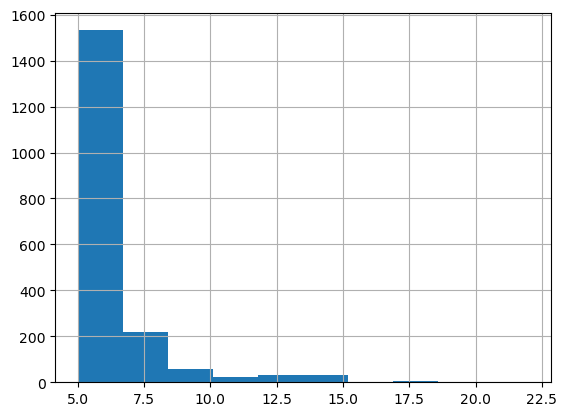

In [12]:
search_list_new['s'] = search_list_new['城市'] + ' ' + search_list_new["市县区"] 
search_list_new['l'] = search_list_new['s'].apply(len)
search_list_new['l'].hist()
plt.show()
search_list_new.to_excel("search_list_new.xlsx")